In [1]:

import sys
sys.path.insert(0,'/home/aw1223/ip/agile')

from sdk.ample import Ample

from sdk.graphs.random_graph import RandomGraph
#TODO change to just models in file sturcture
from sdk.models.models import GCN_Model, GAT_Model, GraphSAGE_Model, GIN_Model, GCN_MLP_Model, MLP_Model, Edge_Embedding_Model, Interaction_Net_Model
from sdk.graph_tracer import GraphTracer
%reload_ext autoreload
%load_ext autoreload
%autoreload 2


/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import argparse
from sdk.trained_graph import TrainedGraph
import torch
from sdk.initialization_manager import InitManager
from sdk.benchmarking_manager import BenchmarkingManager
from sdk.graphs.random_graph import RandomGraph
from torch_geometric.datasets import FakeDataset

workarea = os.environ.get('WORKAREA')
base_path = os.path.join(workarea, 'hw/sim/layer_config')


args = argparse.Namespace(
    cpu=0,
    gpu=0,
    sim=1,
    preload=0,
    fpga_clk_freq=200e6,
    device = 0,
    tb_tolerance=0.1,
    tb_log_level='INFO',
    build=0,
    gui=0
)
graph = RandomGraph(num_nodes=20, avg_degree=1, num_channels=32)

model = MLP_Model()
dataset = FakeDataset(num_graphs=1, 
                    avg_num_nodes = 20,
                    avg_degree=1,
                    num_channels=32,
                    edge_dim=0
                    )[0]
dataset.edge_index = None
# num_nodes = dataset.x.size(0)  
# self_connections = torch.arange(0, num_nodes)
# dataset.edge_index = torch.stack([self_connections, self_connections], dim=0)
graph = TrainedGraph(dataset)

init_manager = InitManager(graph, model, base_path=base_path)

bman = BenchmarkingManager(graph=graph, model=model,args=args)
init_manager.trained_graph.random_embeddings()
init_manager.map_memory() #Has to be done first
init_manager.dump_memory()

init_manager.dump_nodeslot_programming()
init_manager.dump_layer_config()
# init_manager.embedding_expectation()
init_manager.save_model()
init_manager.save_graph()
metrics = bman.benchmark()

    


2it [00:00, 16194.22it/s]
/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/torch/jit/_trace.py:1088: TracerWarning: Encountering a list at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider using a constant container instead (e.g. for `list`, use a `tuple` instead. for `dict`, use a `NamedTuple` instead). If you absolutely need this and know the side effects, pass strict=False to trace() to allow this behavior.
  module._c._create_method_from_trace(


cd /home/aw1223/ip/agile/hw/sim
==== Running command: cd /home/aw1223/ip/agile/hw/sim; make run_sim
make -f Makefile.modelsim run_sim
make[1]: Entering directory '/home/aw1223/ip/agile/hw/sim'
set -o pipefail; LIBPYTHON_LOC=/home/aw1223/anaconda3/envs/ample/lib/libpython3.11.so.1.0 MODULE=runner TESTCASE= TOPLEVEL="work.top_wrapper" \
GPI_EXTRA= TOPLEVEL_LANG=verilog \
 /mnt/applications/mentor/modelsim-2019.2/modelsim/modeltech/linux_x86_64/vsim -c -64 -l sim_build/modelsim.log -onfinish exit -do sim_build/../simulate_no_gui.do -quiet -suppress vsim-3015  -pli /home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/cocotb/libs/libcocotbvpi_modelsim.so \
 \
work.work_opt \
 2>&1 | tee sim_build/simulate.log
/mnt/applications/mentor/modelsim-2019.2/modelsim/modeltech/linux_x86_64/vish: /mnt/applications/Xilinx/19.2/Vitis/2019.2/lib/lnx64.o/libxml2.so.2: no version information available (required by /lib64/libfontconfig.so.1)
/mnt/applications/mentor/modelsim-2019.2/modelsim/model

In [1]:
#Trace model, find the constituent models e.g GCN, Interaction net and create a data flow graph
import sys

import torch
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam')

from neural_lam.models.graph_lam import GraphLAM
from neural_lam.weather_dataset import WeatherDataset
from neural_lam.utils import make_mlp

from neural_lam.interaction_net import InteractionNet

import argparse
# Manually create the args Namespace object with the desired parameters
args = argparse.Namespace(
    dataset='meps_example',
    model='graph_lam',
    subset_ds=0,
    seed=42,
    n_workers=1,
    epochs=1,
    batch_size=1,
    load=None,
    restore_opt=0,
    precision=32,
    graph='1level',
    hidden_dim=64,
    hidden_layers=1,
    processor_layers=1,
    mesh_aggr='sum',
    output_std=0,
    ar_steps=1,
    control_only=0,
    loss='wmse',
    step_length=1,
    lr=0.001,
    val_interval=1,
    eval='test',
    n_example_pred=1
)
print('Neural LAM Args', args)
#Change to neural-lam directory
%cd /home/aw1223/ip/worktree_a/imports/neural-lam

eval_loader = torch.utils.data.DataLoader(
                WeatherDataset(
                    args.dataset,
                    pred_length=1,
                    split="test",
                    subsample_step=args.step_length,
                    subset=bool(args.subset_ds),
                ),
                args.batch_size,
                shuffle=False,
                num_workers=args.n_workers,
            )


/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Neural LAM Args Namespace(dataset='meps_example', model='graph_lam', subset_ds=0, seed=42, n_workers=1, epochs=1, batch_size=1, load=None, restore_opt=0, precision=32, graph='1level', hidden_dim=64, hidden_layers=1, processor_layers=1, mesh_aggr='sum', output_std=0, ar_steps=1, control_only=0, loss='wmse', step_length=1, lr=0.001, val_interval=1, eval='test', n_example_pred=1)
/home/aw1223/ip/worktree_a/imports/neural-lam


In [2]:
ample = Ample()
model = GraphLAM(args)

NameError: name 'Ample' is not defined

Moving model to Ample
Compiling model


----------------------------------------
grid_features
tensor([[[ 0.4806, -0.0336, -0.3140,  ..., -0.9964,  0.0135,  1.0000],
         [ 0.4780, -0.0584, -0.3279,  ..., -0.9964,  0.0134,  1.0000],
         [ 0.4722, -0.0501, -0.3418,  ..., -0.9964,  0.0139,  1.0000],
         ...,
         [-0.4094,  1.8461,  1.6338,  ...,  1.0000,  0.1689,  1.0000],
         [ 0.0804,  1.8535,  1.5504,  ...,  1.0000,  0.1180,  1.0000],
         [ 0.1589,  1.7979,  1.4808,  ...,  1.0000,  0.1094,  1.0000]]])
Shape: torch.Size([1, 63784, 54])
----------------------------------------
g2m_features
tensor([[ 0.5000, -0.3319, -0.3739],
        [ 0.3884, -0.1050, -0.3739],
        [ 0.3933,  0.1218, -0.3739],
        ...,
        [ 0.3933, -0.1218,  0.3739],
        [ 0.3884,  0.1050,  0.3739],
        [ 0.5000,  0.3319,  0.3739]])
Shape: torch.Size([100656, 3])
----------------------------------------
edge_index1
tensor([[ 6561,  6562,  6563,  ..., 70342, 70343, 70344],
        [    0,     0,     0,  ...,  

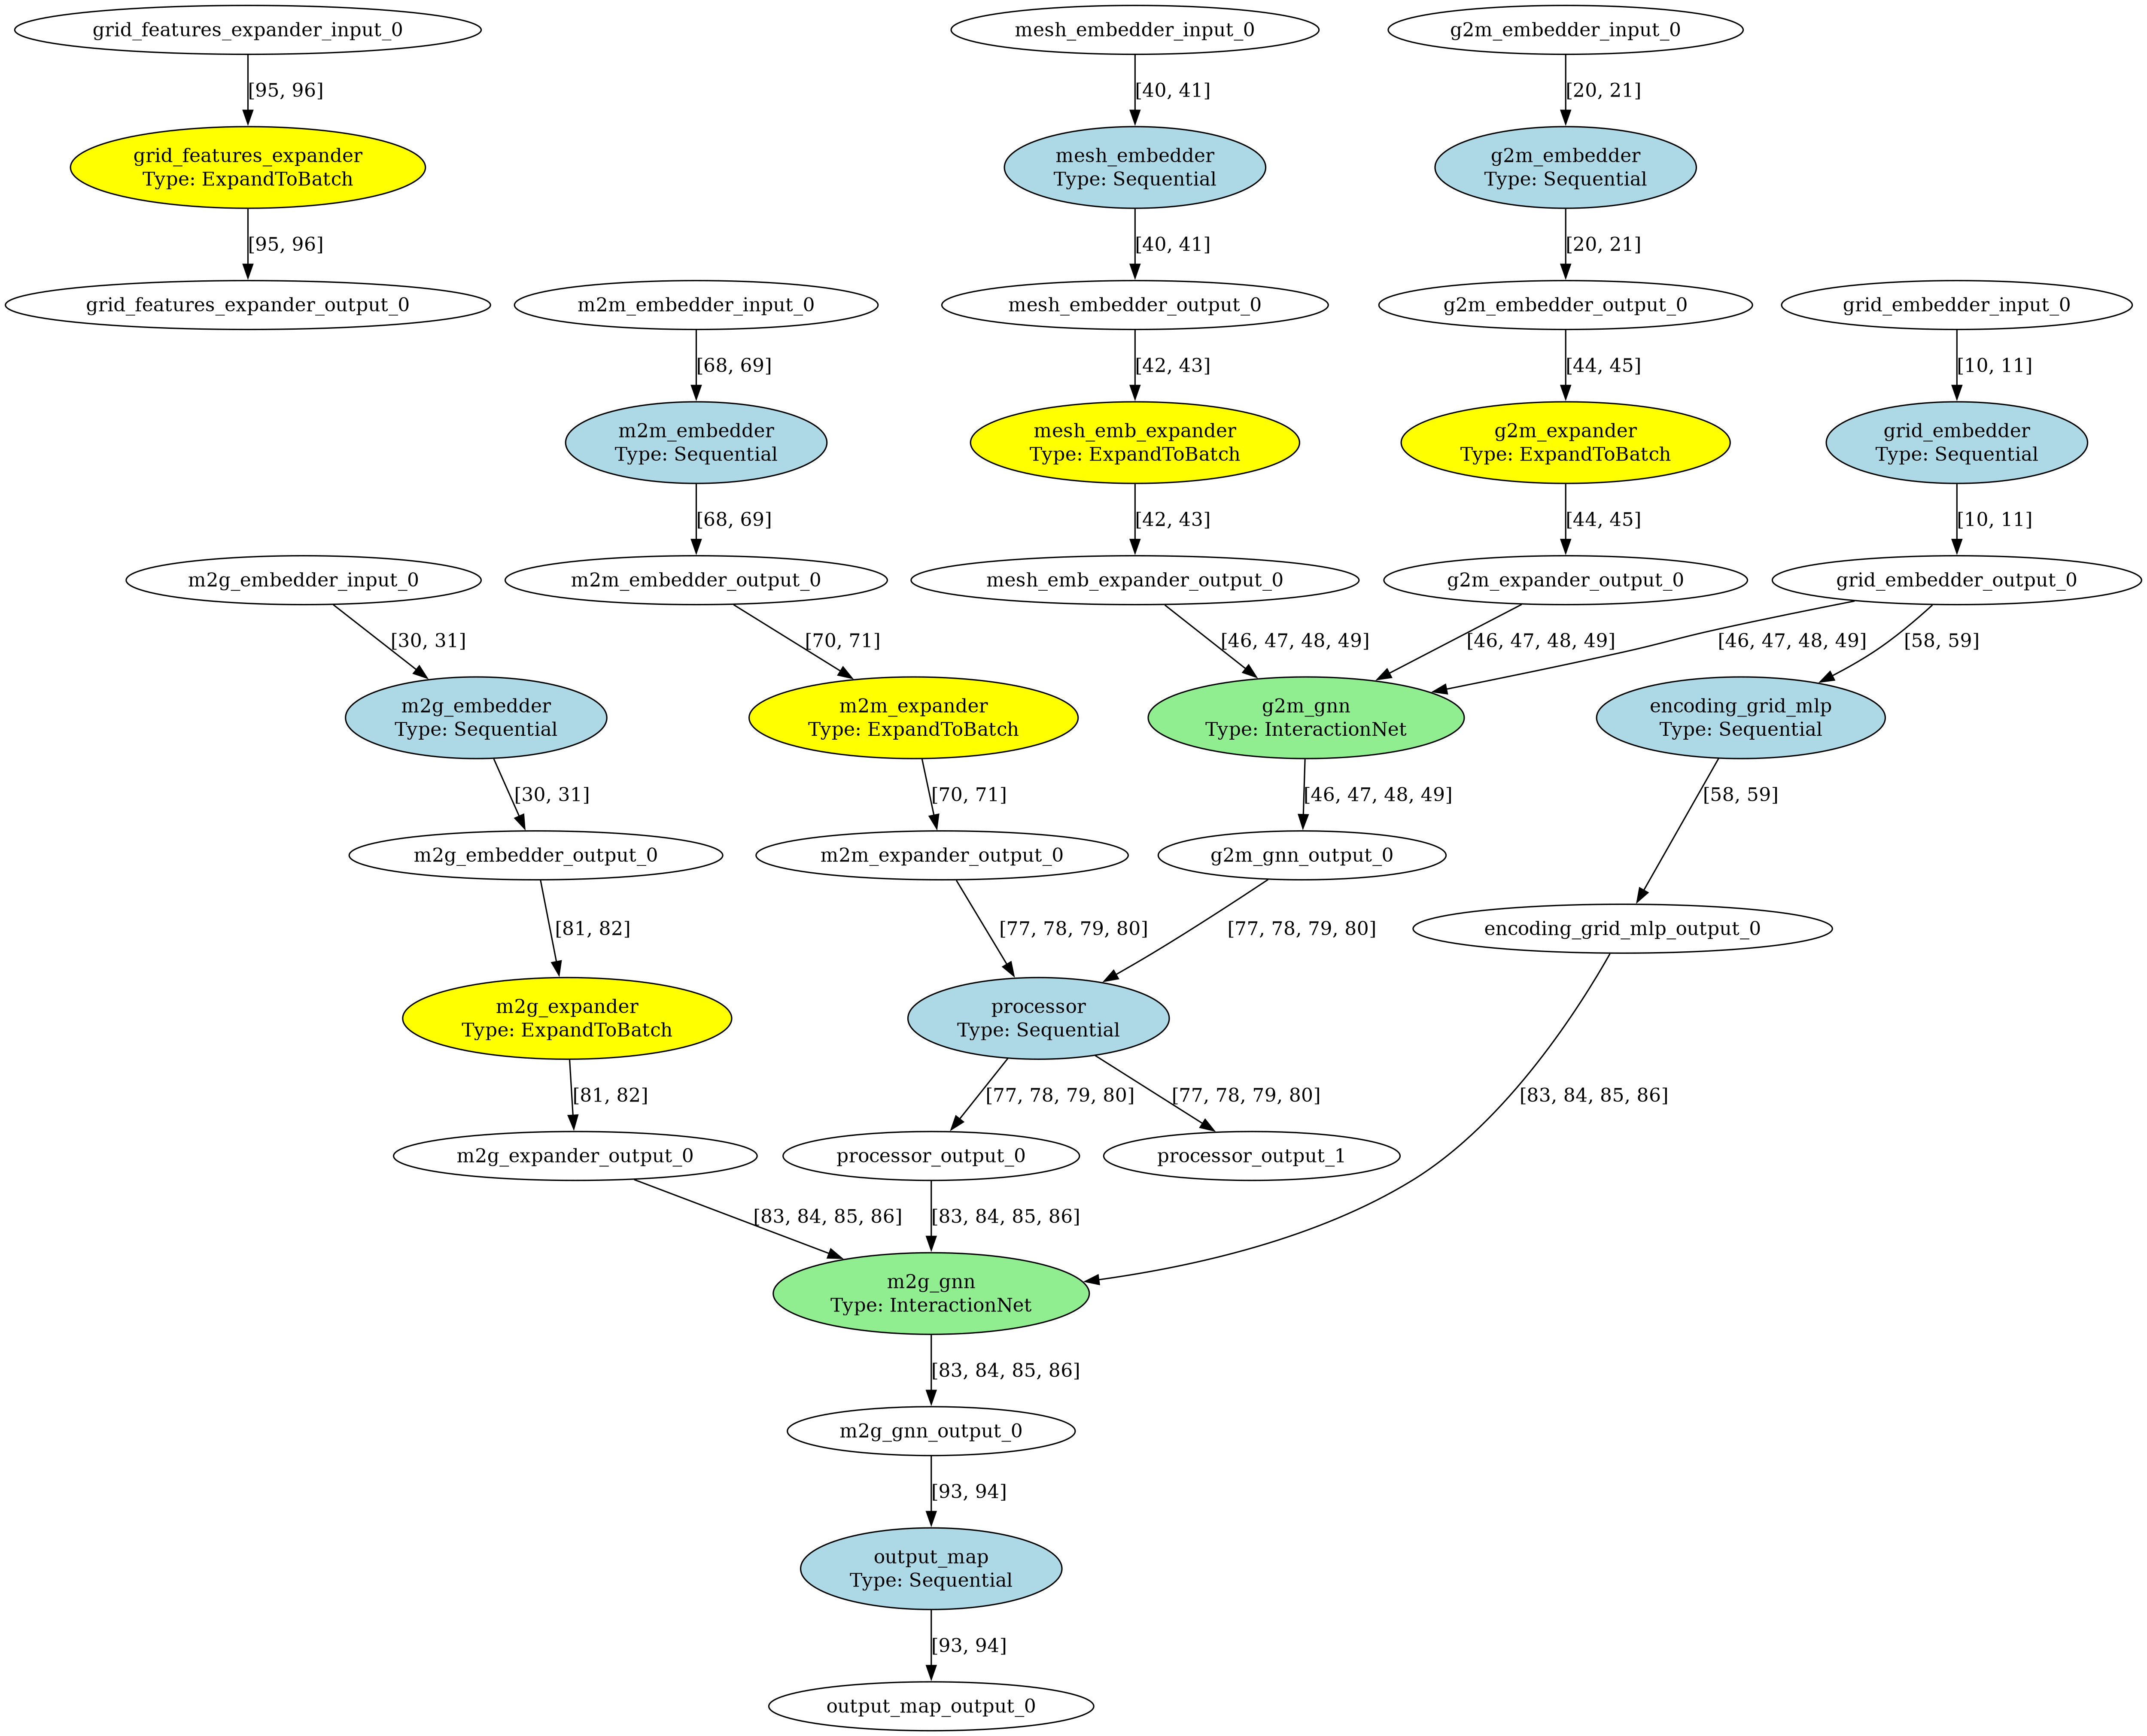

In [6]:
model.to_device('ample',data_loader=eval_loader)


In [ ]:
# ample.to_device()

In [ ]:
# import pytorch_lightning as pl
# trainer = pl.Trainer(
#       max_epochs=args.epochs,
#       deterministic=True,
#       strategy="ddp_notebook",
#       # accelerator=device_name,
#       # logger=logger,
#       log_every_n_steps=1,
#       # callbacks=[checkpoint_callback],
#       check_val_every_n_epoch=args.val_interval,
#       precision=args.precision,
#   )



# trainer.test(model=model, dataloaders=eval_loader)


In [ ]:
#Use initalize to construct memory map for each model and then string together the dataflow between models

In [ ]:
#Program Agile using device